In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [55]:
df = pd.read_csv('data/flight.csv')
df['time_hour'] = pd.to_datetime(df['time_hour'])
df['date'] = df['time_hour'].map(lambda x: x.strftime('%Y-%m-%d'))
df['year'] = df['time_hour'].dt.year
df['month'] = df['time_hour'].dt.month
df['day'] = df['time_hour'].dt.day
df['hour'] = df['time_hour'].dt.hour
df['minute'] = df['time_hour'].dt.minute
df['day_of_week'] = df['time_hour'].dt.dayofweek
df.head()

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,distance,time_hour,date,year,month,day,hour,minute,day_of_week
0,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,1400,2013-01-01 05:00:00,2013-01-01,2013,1,1,5,0,1
1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,1416,2013-01-01 05:00:00,2013-01-01,2013,1,1,5,0,1
2,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,1089,2013-01-01 05:00:00,2013-01-01,2013,1,1,5,0,1
3,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,1576,2013-01-01 05:00:00,2013-01-01,2013,1,1,5,0,1
4,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,762,2013-01-01 06:00:00,2013-01-01,2013,1,1,6,0,1


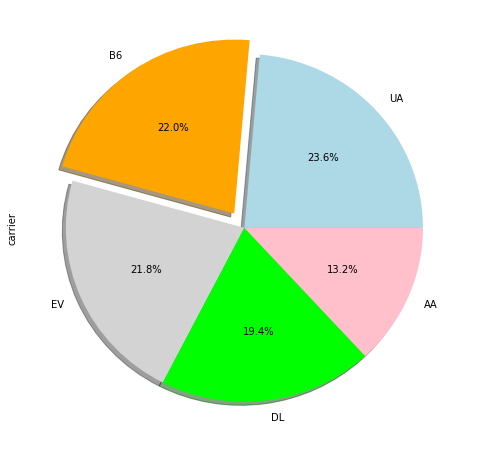

In [56]:
plt.figure(figsize=(8,8))
explode = (0, 0.1,0,0,0)

df.carrier.value_counts()[df.carrier.value_counts()>30000].plot.pie(autopct='%1.1f%%',shadow=True, explode = explode,
                                 colors=['lightblue','orange','lightgrey', 'lime', 'pink'])
plt.show()

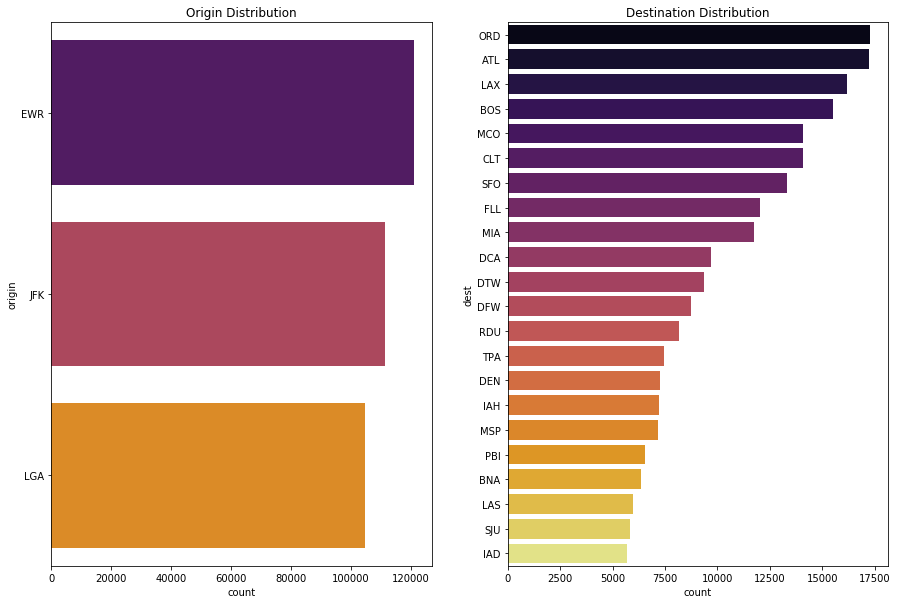

In [57]:
f,ax=plt.subplots(1,2,figsize=(15,10))

sns.countplot(y=df.origin, order= df.origin.value_counts()[df.origin.value_counts()>50].index,
     ax=ax[0], palette = 'inferno')
ax[0].set_title('Origin Distribution')

sns.countplot(y=df.dest, order=  df.dest.value_counts()[df.dest.value_counts()>5000].index,
      ax=ax[1], palette = 'inferno')
ax[1].set_title('Destination Distribution')

plt.show()

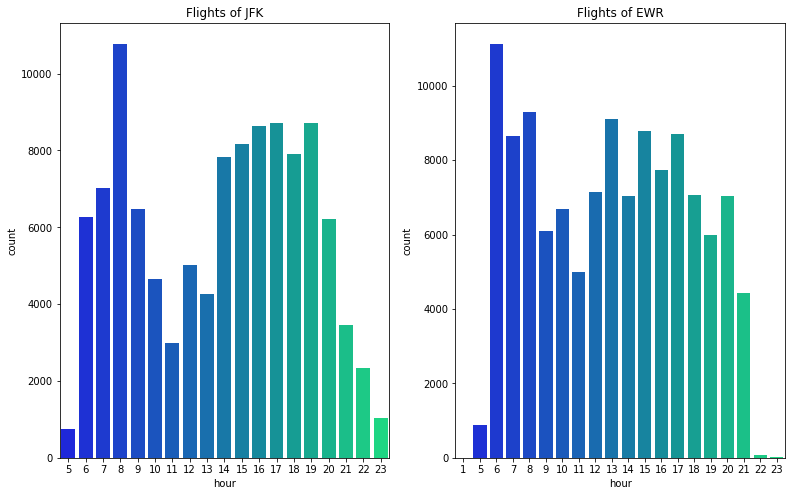

In [58]:
f,ax=plt.subplots(1,2,figsize=(13,8))
sns.set()

ax[0].set_title('Flights of JFK')
sns.countplot(x='hour', data=df[df.origin=='JFK'], ax = ax[0], palette = 'winter')
    
ax[1].set_title('Flights of EWR')
sns.countplot(x='hour', data=df[df.origin=='EWR'], ax = ax[1], palette = 'winter')
plt.show()

/home/stats/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:641: UserWarning: Unrecognized location "Month Distributions of flights based on origin". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


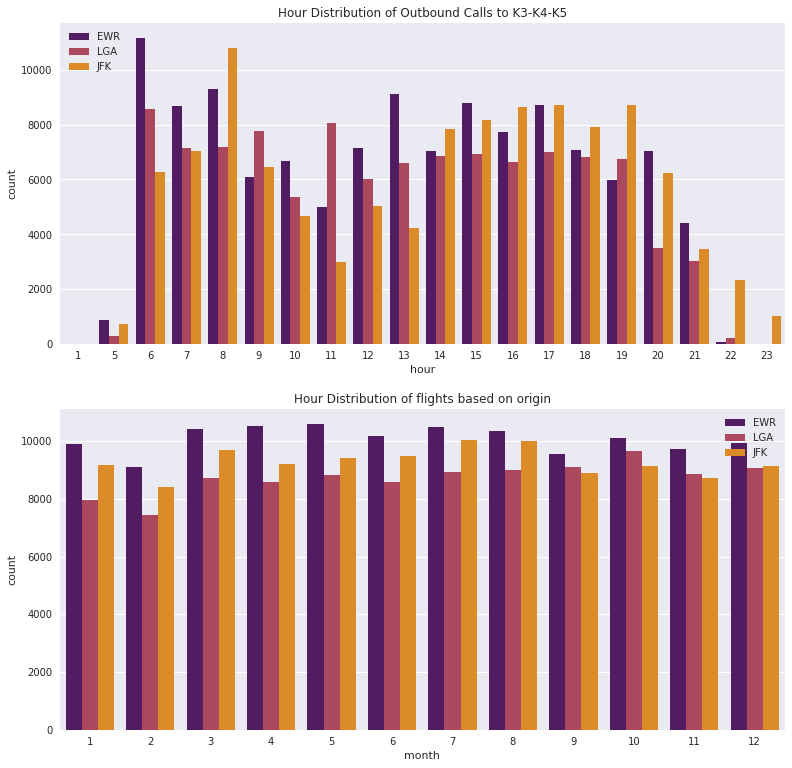

In [59]:
f,ax=plt.subplots(2,1,figsize=(13,13))
sns.set()

ax[0].set_title('Hour Distribution of Outbound Calls to K3-K4-K5')
sns.countplot(x='hour', hue = 'origin', data=df, ax = ax[0], 
                                                              palette = 'inferno')
ax[0].legend(loc='upper left')

ax[1].set_title('Hour Distribution of flights based on origin')

sns.countplot(x='month', hue = 'origin', data=df, ax = ax[1], 
                                                                  palette = 'inferno')
ax[1].legend(loc='Month Distributions of flights based on origin')
plt.subplots_adjust(hspace=0.2)
plt.show()

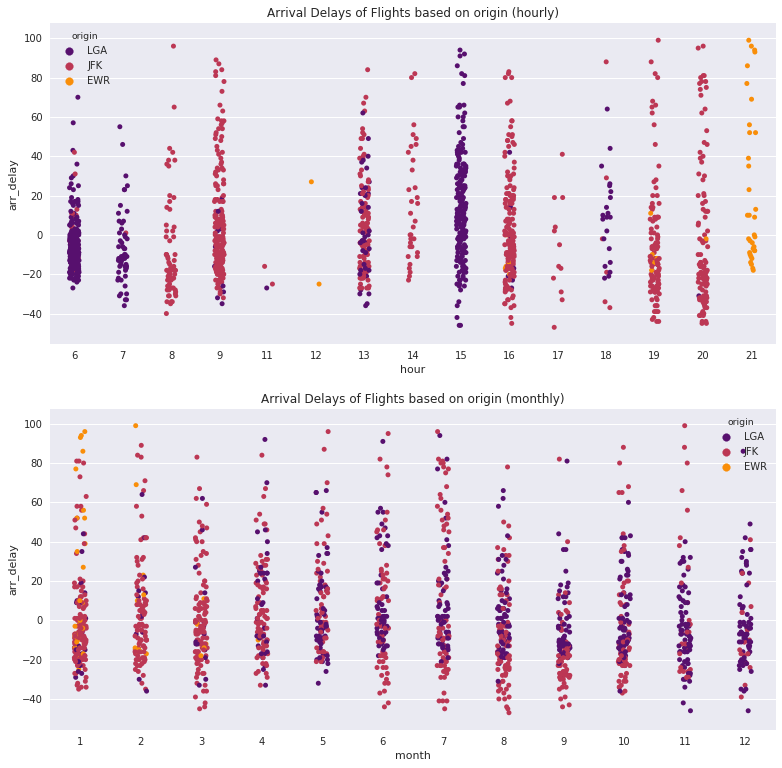

In [61]:
f,ax=plt.subplots(2,1,figsize=(13,13))
sns.set()

df1 = df[(df.distance<100)]

ax[0].set_title('Arrival Delays of Flights based on origin (hourly)')
sns.stripplot(x='hour', y='arr_delay', hue = 'origin', data=df1, ax = ax[0], 
                                                        jitter=True,     palette = 'inferno')

ax[1].set_title('Arrival Delays of Flights based on origin (monthly)')

sns.stripplot(x='month', y = 'arr_delay', hue = 'origin', data=df1, ax = ax[1], 
                                                          jitter=True,        palette = 'inferno')

plt.subplots_adjust(hspace=0.2)
plt.show()

<Figure size 720x720 with 0 Axes>

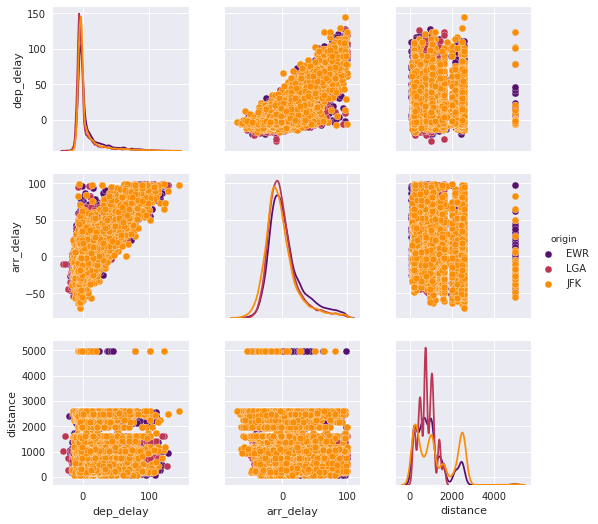

In [62]:
plt.figure(figsize=(10,10))
df1 = df[df.month==1]
g = sns.pairplot(df1[["origin",
        'dep_delay',
   'arr_delay', 'distance']], hue="origin", diag_kind="kde", palette='inferno',)
plt.show()

### Korelasyon Matrisi

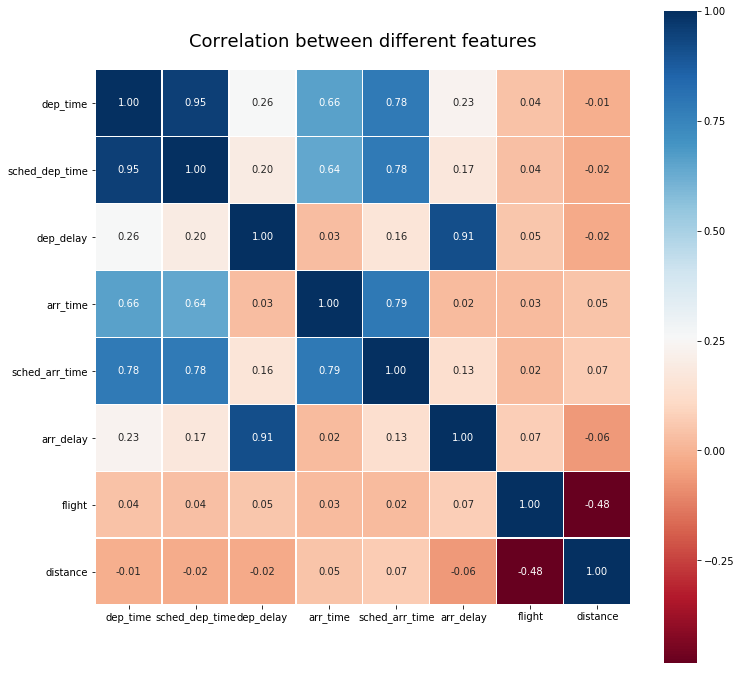

In [49]:
a,x = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, linecolor='white', square = True, 
            linewidths= 0.1, vmax = 1, fmt= '.2f', cmap = 'RdBu',ax=x)
plt.title('Correlation between different features', y=1.03, size=18)
plt.show()

### Histogram 

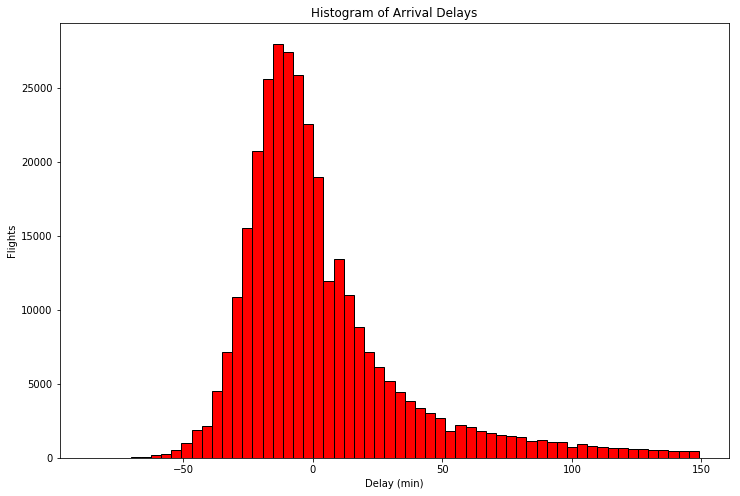

In [50]:
a,x = plt.subplots(figsize=(12, 8))
df1 = df[df.arr_delay < 150]
plt.hist(df1.arr_delay, bins = int(180/3), edgecolor='black', color = 'red')
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')
plt.show()

### Dist-plot

/home/stats/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


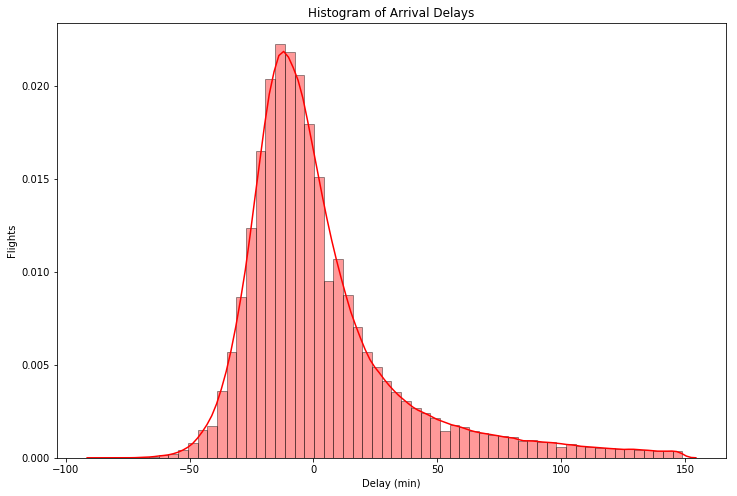

In [51]:
a,x = plt.subplots(figsize=(12, 8))
import seaborn as sns 
sns.distplot(df1['arr_delay'],  
             bins=int(180/3), ax=x, hist_kws={'edgecolor':'black'}, color = 'r')
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')
plt.show()

### Kde-plot

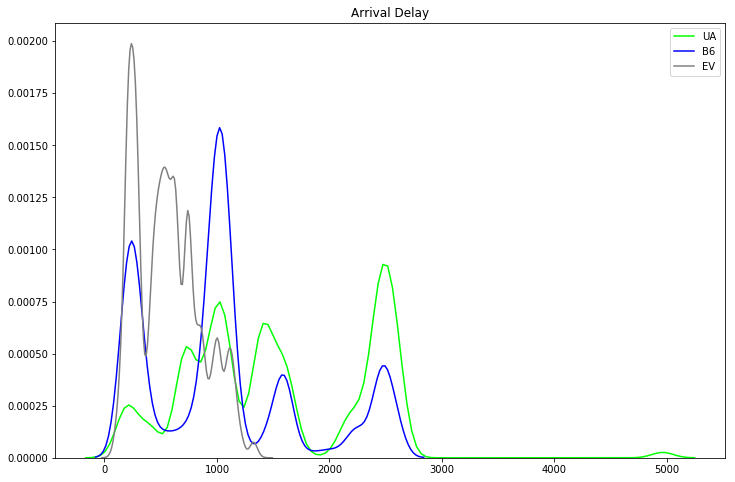

In [52]:
a,x = plt.subplots(figsize=(12, 8))
sns.kdeplot(df[(df.carrier=='UA')].distance,color = 'lime',label = 'UA')
sns.kdeplot(df[(df.carrier=='B6')].distance, color = 'blue',label = 'B6')
sns.kdeplot(df[(df.carrier=='EV')].distance,color = 'grey',label = 'EV')
plt.title("Arrival Delay")
plt.show()

### Scatterplot

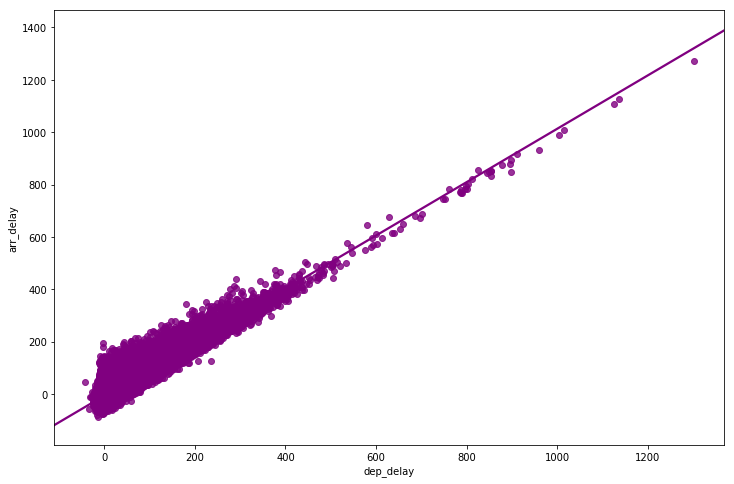

In [53]:
a,x = plt.subplots(figsize=(12, 8))
sns.regplot(x=df["dep_delay"], y=df["arr_delay"], color = 'purple', ax=x)
plt.show()